In [1]:
import pandas as pd
import glob
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import pacf

In [2]:
from pmdarima.arima import auto_arima

In [3]:
data = pd.read_excel('consumo_energia_industrial_mg.xlsx')
data.shape

(117, 5)

In [4]:
data.head()

,Time,UF,Descrição,Setor,Consumo_MWh
0,2013-1-1,Minas Gerais,Consumo de energia elétrica na rede (MWh),Industrial,2429892.0
1,2013-2-1,Minas Gerais,Consumo de energia elétrica na rede (MWh),Industrial,2392524.0
2,2013-3-1,Minas Gerais,Consumo de energia elétrica na rede (MWh),Industrial,2398782.0
3,2013-4-1,Minas Gerais,Consumo de energia elétrica na rede (MWh),Industrial,2542895.0
4,2013-5-1,Minas Gerais,Consumo de energia elétrica na rede (MWh),Industrial,2523754.0


In [5]:
data['Time'] = pd.to_datetime(data['Time'].str.strip(), format='%Y-%m-%d')

In [6]:
data.dtypes

Time           datetime64[ns]
UF                     object
Descrição              object
Setor                  object
Consumo_MWh           float64
dtype: object

In [7]:
data.head()

,Time,UF,Descrição,Setor,Consumo_MWh
0,2013-01-01,Minas Gerais,Consumo de energia elétrica na rede (MWh),Industrial,2429892.0
1,2013-02-01,Minas Gerais,Consumo de energia elétrica na rede (MWh),Industrial,2392524.0
2,2013-03-01,Minas Gerais,Consumo de energia elétrica na rede (MWh),Industrial,2398782.0
3,2013-04-01,Minas Gerais,Consumo de energia elétrica na rede (MWh),Industrial,2542895.0
4,2013-05-01,Minas Gerais,Consumo de energia elétrica na rede (MWh),Industrial,2523754.0


In [8]:
data.columns

Index(['Time', 'UF', 'Descrição', 'Setor', 'Consumo_MWh'], dtype='object')

In [9]:
data = data[['Time', 'Consumo_MWh']]

In [10]:
data = data.set_index(['Time'])

<Axes: xlabel='Time'>

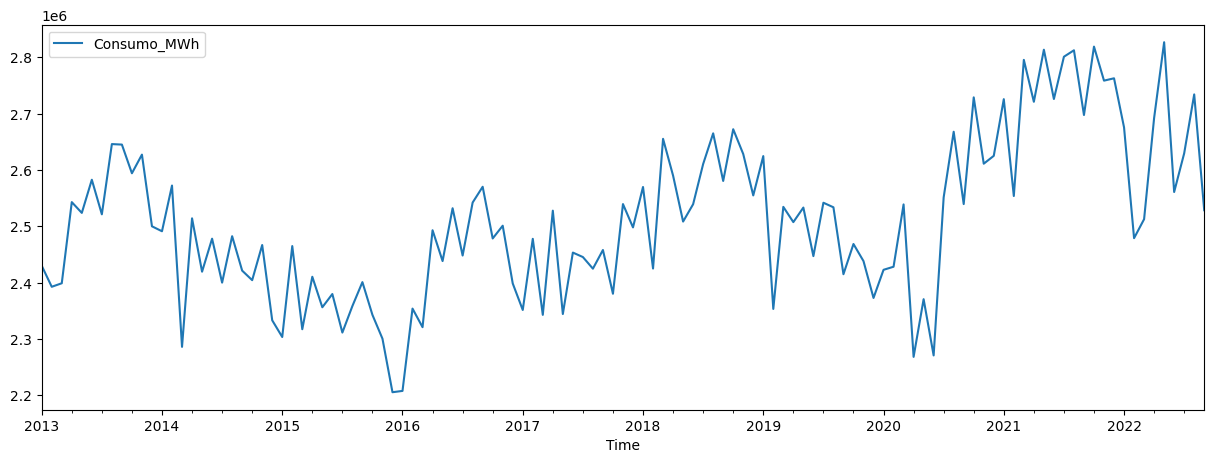

In [11]:
data.plot(figsize=(15,5))

In [12]:
TEST_SIZE = 18
train, test = data.iloc[:-TEST_SIZE], data.iloc[-TEST_SIZE:]
x_train, x_test = np.array(range(train.shape[0])), np.array(range(train.shape[0], data.shape[0]))
train.shape, x_train.shape, test.shape, x_test.shape

((99, 1), (99,), (18, 1), (18,))

In [13]:
test

,Consumo_MWh
Time,
2021-04-01,2721100.22
2021-05-01,2813607.47
2021-06-01,2726046.96
2021-07-01,2801119.91
2021-08-01,2812574.63
2021-09-01,2697635.74
2021-10-01,2819109.14
2021-11-01,2758660.41
2021-12-01,2762812.63


In [14]:
test['Consumo_MWh'].sum()
#49885047.056493714

48552050.97

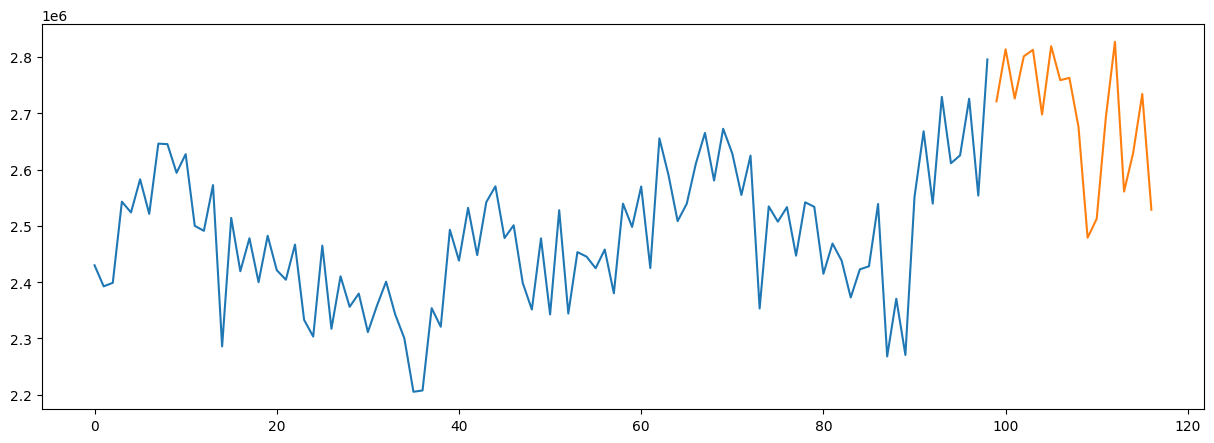

In [15]:
fig, ax = plt.subplots(1, 1, figsize=(15, 5))
ax.plot(x_train, train)
ax.plot(x_test, test)

In [16]:
model = auto_arima(train, start_p=1, start_q=1,
                      test='adf',
                      max_p=5, max_q=5,
                      m=1,             
                      d=1,          
                      seasonal=False,   
                      start_P=0, 
                      D=None, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=2564.303, Time=0.05 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=2560.917, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=2561.925, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=2558.456, Time=0.02 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=2559.031, Time=0.02 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=2559.729, Time=0.04 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=2563.462, Time=0.15 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=2556.889, Time=0.03 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=2562.658, Time=0.04 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=2558.017, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=2560.306, Time=0.01 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=2561.629, Time=0.08 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0]          
Total fit time: 0.537 seconds


In [17]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   99
Model:               SARIMAX(0, 1, 1)   Log Likelihood               -1276.444
Date:                Tue, 11 Jun 2024   AIC                           2556.889
Time:                        15:32:04   BIC                           2562.059
Sample:                    01-01-2013   HQIC                          2558.980
                         - 03-01-2021                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.1075      0.017     -6.194      0.000      -0.142      -0.073
sigma2      9.241e+09   3.01e-14   3.07e+23      0.000    9.24e+09    9.24e+09
===================================================================================
Ljung-Box (L1) (Q):                  24.49   Jarque-Bera (JB):                 0.02
Prob(Q):                              0.00   Prob(JB):                         0.99
Heteroskedasticity (H):               1.45   Skew:                            -0.04
Prob(H) (two-sided):                  0.29   Kurtosis:                         3.02
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.68e+39. Standard errors may be unstable.
"""

In [18]:
# Forecast

prediction, confint = model.predict(n_periods=TEST_SIZE, return_conf_int=True)

prediction

2021-04-01    2.771392e+06
2021-05-01    2.771392e+06
2021-06-01    2.771392e+06
2021-07-01    2.771392e+06
2021-08-01    2.771392e+06
2021-09-01    2.771392e+06
2021-10-01    2.771392e+06
2021-11-01    2.771392e+06
2021-12-01    2.771392e+06
2022-01-01    2.771392e+06
2022-02-01    2.771392e+06
2022-03-01    2.771392e+06
2022-04-01    2.771392e+06
2022-05-01    2.771392e+06
2022-06-01    2.771392e+06
2022-07-01    2.771392e+06
2022-08-01    2.771392e+06
2022-09-01    2.771392e+06
Freq: MS, dtype: float64

In [19]:
prediction.sum()

49885047.056493714

In [20]:
cf= pd.DataFrame(confint)

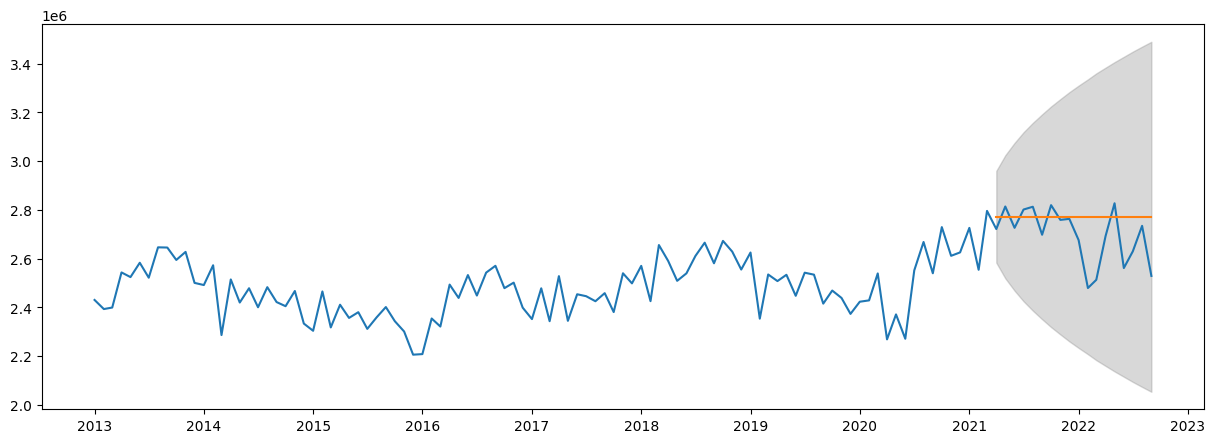

In [21]:
#Mostramos la gráfica con la predicción de los 2 últimos años en naranja
#sobre la serie real 
prediction_series = pd.Series(prediction,index=test.index)
fig, ax = plt.subplots(1, 1, figsize=(15, 5))
ax.plot(data.Consumo_MWh)
ax.plot(prediction_series)
ax.fill_between(prediction_series.index,
                cf[0],
                cf[1],color='grey',alpha=.3)

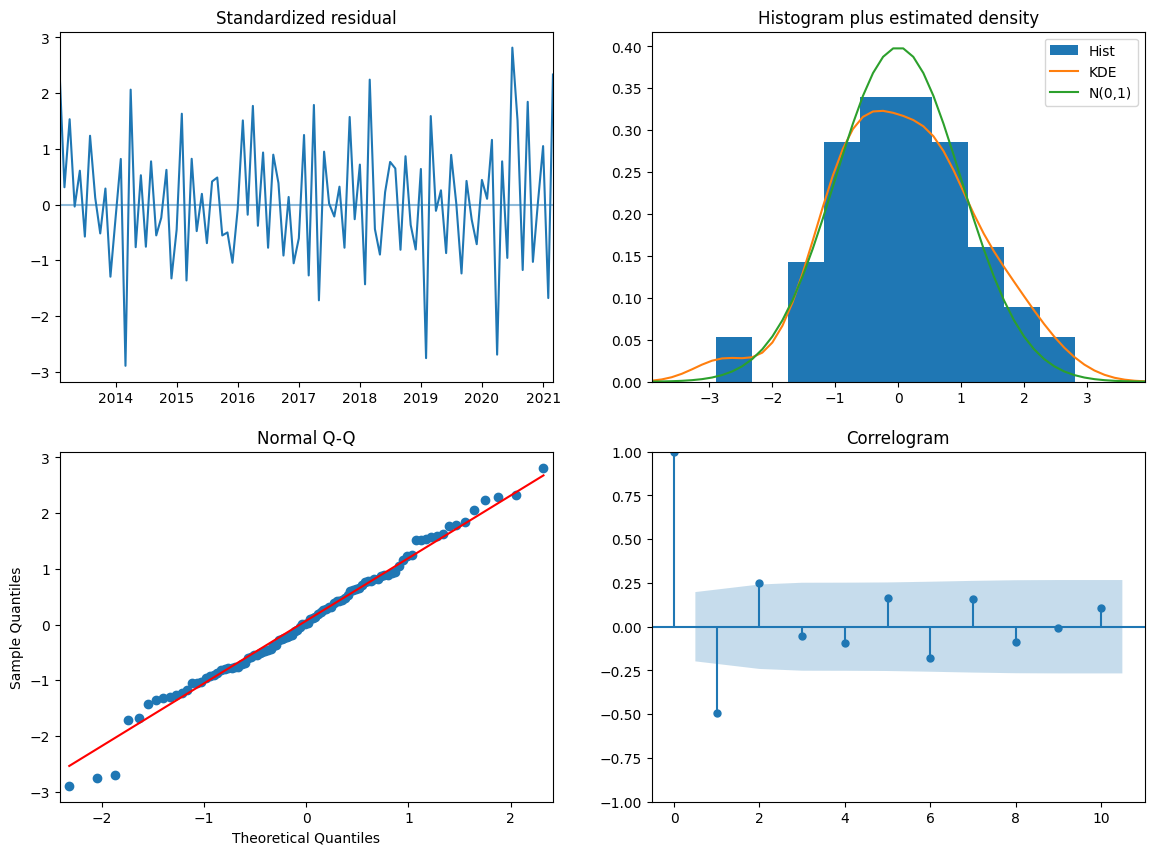

In [22]:
model.plot_diagnostics(figsize=(14,10))
plt.show()

In [23]:
def calcsmape(actual, forecast):
    return 1/len(actual) * np.sum(2 * np.abs(forecast-actual) / (np.abs(actual) + np.abs(forecast)))

In [24]:
smape = calcsmape(test.Consumo_MWh, prediction)
smape

0.036504808980995396

In [25]:
TEST_SIZE = 9
train, test = data.iloc[:-TEST_SIZE], data.iloc[-TEST_SIZE:]
x_train, x_test = np.array(range(train.shape[0])), np.array(range(train.shape[0], data.shape[0]))
train.shape, x_train.shape, test.shape, x_test.shape

((108, 1), (108,), (9, 1), (9,))

In [26]:
train.tail()

,Consumo_MWh
Time,
2021-08-01,2812574.63
2021-09-01,2697635.74
2021-10-01,2819109.14
2021-11-01,2758660.41
2021-12-01,2762812.63


In [27]:
test.head()

,Consumo_MWh
Time,
2022-01-01,2675568.91
2022-02-01,2478883.57
2022-03-01,2512583.18
2022-04-01,2692276.48
2022-05-01,2826894.62


In [28]:
test['Consumo_MWh'].sum()

23639383.86

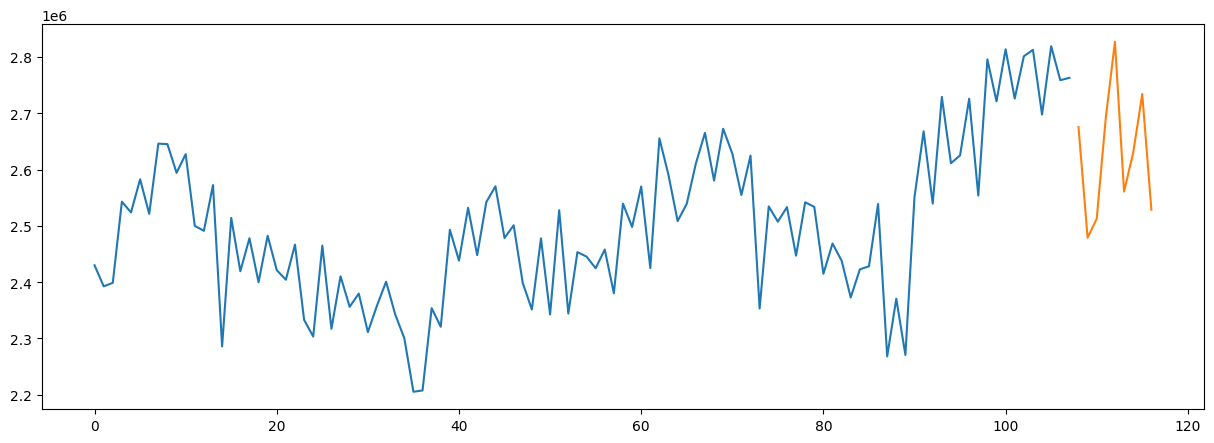

In [29]:
fig, ax = plt.subplots(1, 1, figsize=(15, 5))
ax.plot(x_train, train)
ax.plot(x_test, test)

In [30]:
model = auto_arima(train, start_p=1, start_q=1,
                      test='adf',
                      max_p=5, max_q=5,
                      m=1,             
                      d=1,          
                      seasonal=False,   
                      start_P=0, 
                      D=None, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=2794.302, Time=0.04 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=2791.389, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=2791.862, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=2788.145, Time=0.04 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=2789.479, Time=0.01 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=2789.320, Time=0.04 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=2793.417, Time=0.15 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=2786.517, Time=0.02 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=2792.643, Time=0.05 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=2787.618, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=2790.220, Time=0.02 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=2791.445, Time=0.09 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0]          
Total fit time: 0.526 seconds


In [31]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  108
Model:               SARIMAX(0, 1, 1)   Log Likelihood               -1391.258
Date:                Tue, 11 Jun 2024   AIC                           2786.517
Time:                        15:32:06   BIC                           2791.862
Sample:                    01-01-2013   HQIC                          2788.684
                         - 12-01-2021                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.1133      0.016     -7.271      0.000      -0.144      -0.083
sigma2      8.756e+09   3.96e-14   2.21e+23      0.000    8.76e+09    8.76e+09
===================================================================================
Ljung-Box (L1) (Q):                  27.99   Jarque-Bera (JB):                 0.04
Prob(Q):                              0.00   Prob(JB):                         0.98
Heteroskedasticity (H):               1.43   Skew:                            -0.01
Prob(H) (two-sided):                  0.29   Kurtosis:                         3.09
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 6.77e+38. Standard errors may be unstable.
"""

In [32]:
prediction, confint = model.predict(n_periods=TEST_SIZE, return_conf_int=True)

prediction

2022-01-01    2.762960e+06
2022-02-01    2.762960e+06
2022-03-01    2.762960e+06
2022-04-01    2.762960e+06
2022-05-01    2.762960e+06
2022-06-01    2.762960e+06
2022-07-01    2.762960e+06
2022-08-01    2.762960e+06
2022-09-01    2.762960e+06
Freq: MS, dtype: float64

In [33]:
prediction.sum()
#23639383.86

24866642.648228683

In [34]:
cf= pd.DataFrame(confint)

In [35]:
cf.head()

,0,1
0,2.579562e+06,2.946358e+06
1,2.517853e+06,3.008067e+06
2,2.468817e+06,3.057103e+06
3,2.426861e+06,3.099059e+06
4,2.389590e+06,3.136330e+06


In [36]:
cf.tail()

,0,1
4,2.389590e+06,3.136330e+06
5,2.355716e+06,3.170204e+06
6,2.324451e+06,3.201469e+06
7,2.295272e+06,3.230649e+06
8,2.267808e+06,3.258112e+06


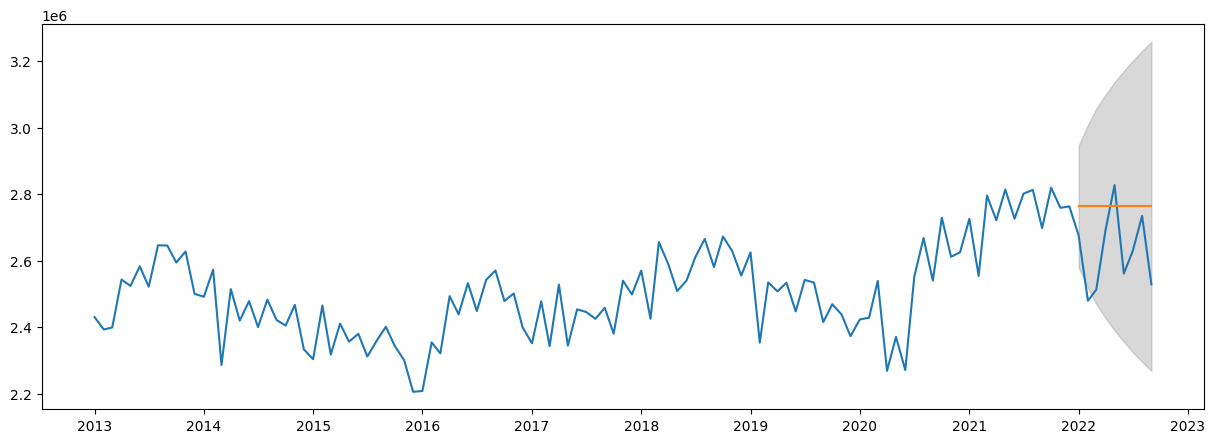

In [37]:
prediction_series = pd.Series(prediction,index=test.index)
fig, ax = plt.subplots(1, 1, figsize=(15, 5))
ax.plot(data.Consumo_MWh)
ax.plot(prediction_series)
ax.fill_between(prediction_series.index,
                cf[0],
                cf[1],color='grey',alpha=.3)

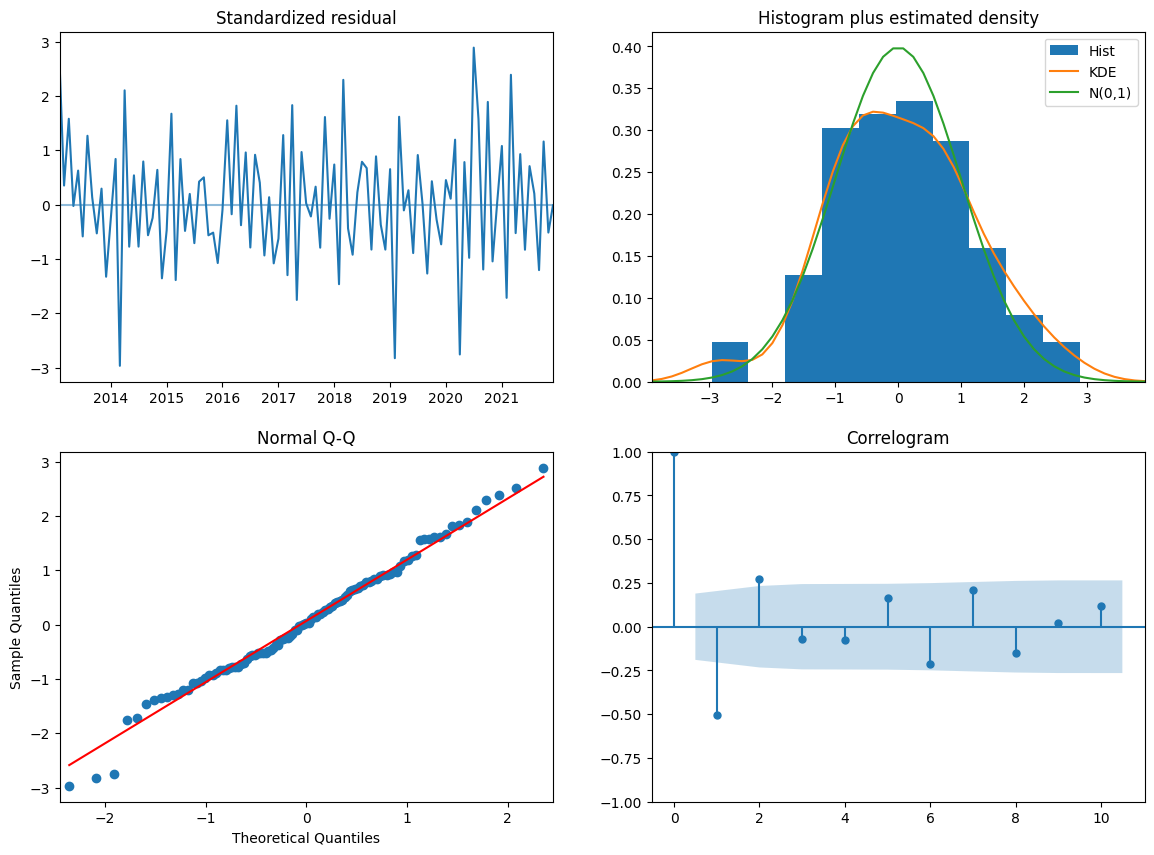

In [38]:
model.plot_diagnostics(figsize=(14,10))
plt.show()

In [39]:
smape=calcsmape(test.Consumo_MWh, prediction)
smape

0.05652153461162078

In [40]:
TEST_SIZE = 1
train, test = data.iloc[:-TEST_SIZE], data.iloc[-TEST_SIZE:]
x_train, x_test = np.array(range(train.shape[0])), np.array(range(train.shape[0], data.shape[0]))
train.shape, x_train.shape, test.shape, x_test.shape

((116, 1), (116,), (1, 1), (1,))

In [41]:
train.tail()

,Consumo_MWh
Time,
2022-04-01,2692276.48
2022-05-01,2826894.62
2022-06-01,2560892.26
2022-07-01,2629564.43
2022-08-01,2734194.73


In [42]:
test.head()

,Consumo_MWh
Time,
2022-09-01,2528525.68


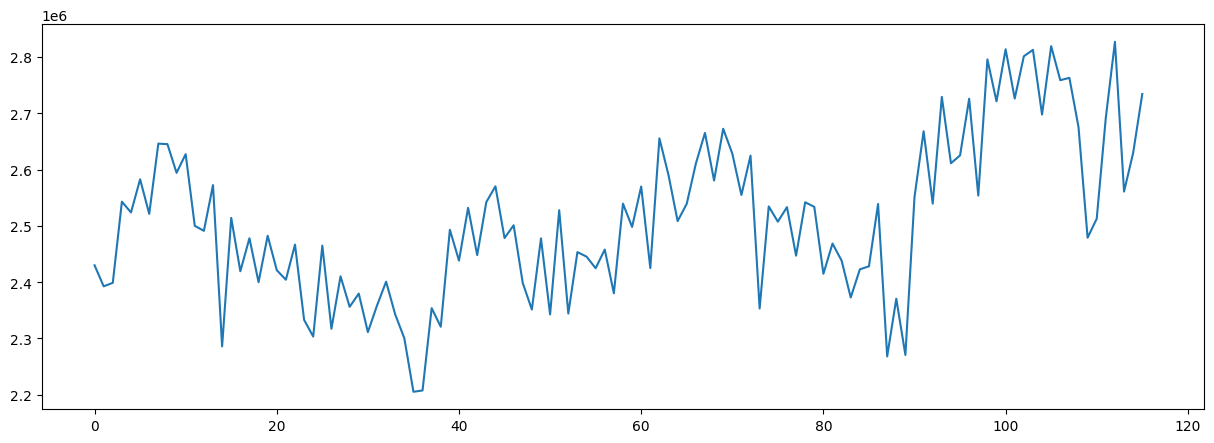

In [43]:
fig, ax = plt.subplots(1, 1, figsize=(15, 5))
ax.plot(x_train, train)
ax.plot(x_test, test)

In [44]:
model = auto_arima(train, start_p=1, start_q=1,
                      test='adf',
                      max_p=5, max_q=5,
                      m=1,             
                      d=1,          
                      seasonal=False,   
                      start_P=0, 
                      D=None, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=3007.061, Time=0.07 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=3006.877, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=3004.334, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=3003.981, Time=0.02 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=3004.944, Time=0.00 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=3004.863, Time=0.05 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=3006.835, Time=0.12 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=3002.307, Time=0.02 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=3005.322, Time=0.03 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=3003.090, Time=0.05 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=3002.612, Time=0.01 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=3005.041, Time=0.12 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0]          
Total fit time: 0.498 seconds


In [45]:
prediction, confint = model.predict(n_periods=TEST_SIZE, return_conf_int=True)

prediction

2022-09-01    2.721668e+06
Freq: MS, dtype: float64

In [46]:
prediction.sum()

2721668.269509227

In [47]:
test.head()

,Consumo_MWh
Time,
2022-09-01,2528525.68


In [48]:
(2721668.269509227 - 2528525.68) / 2528525.68

0.07638545696289975